<b>¡Hola Alejandro!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


### 1. Configuración del Entorno y Carga de Librerías

Para esta fase de implementación, cargaré todas las herramientas que necesitaré. Esto incluye librerías para:

- **Manipulación de datos:** `pandas`, `numpy`
- **Visualización:** `matplotlib`, `seaborn`
- **Preprocesamiento y modelado:** herramientas de `scikit-learn`

Anticipándome a las sugerencias del revisor, también tendré en mente librerías más avanzadas como:

- `xgboost`
- `lightgbm`
- `shap`

Estas las importaré más adelante, cuando las necesite para tareas de selección de características y modelado avanzado.

In [1]:
# --- Librerías Fundamentales ---
# Para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# --- Librerías de Preprocesamiento de Scikit-Learn ---
# Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Para codificar variables categóricas
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Para crear pipelines y componer transformadores
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Librerías de Modelado ---
# Modelos base y avanzados
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# --- Librerías de Evaluación y Optimización ---
# Métricas de rendimiento
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# --- Configuraciones Adicionales ---
# Para ignorar advertencias y mejorar la legibilidad
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para las visualizaciones
sns.set(style='whitegrid')
pd.options.display.max_columns = None # Para ver todas las columnas en los outputs de pandas

print("Librerías y configuraciones cargadas correctamente.")

Librerías y configuraciones cargadas correctamente.


<div class="alert alert-block alert-success">
<b>Celda [1]</b> <a class="tocSkip"></a><br>
Has comenzado adecuadamente al cargar todas las librerías necesarias para el análisis de datos, visualización y modelado. Esto te permite tener todas las herramientas a tu disposición para realizar un análisis completo y eficiente. Asegúrate de que cada librería se utiliza en su contexto adecuado a lo largo del proyecto.
</div>


### 2. Carga de Datos

Voy a cargar los cuatro archivos (`contract.csv`, `personal.csv`, `internet.csv` y `phone.csv`) en DataFrames de `pandas` separados. Después de cargar cada uno, mostraré:

- Sus dimensiones (`shape`)
- Las primeras filas (`head()`)

Esto me permitirá hacer una verificación rápida y asegurarme de que los datos se hayan leído correctamente.

In [19]:
# Definir las rutas de los archivos de datos
path_contract = '/datasets/final_provider/contract.csv'
path_personal = '/datasets/final_provider/personal.csv'
path_internet = '/datasets/final_provider/internet.csv'
path_phone = '/datasets/final_provider/phone.csv'

try:
    # Cargar cada archivo en un DataFrame de Pandas
    df_contract = pd.read_csv(path_contract)
    df_personal = pd.read_csv(path_personal)
    df_internet = pd.read_csv(path_internet)
    df_phone = pd.read_csv(path_phone)

    # Crear un diccionario para iterar y mostrar la información
    dataframes = {
        "Contract": df_contract,
        "Personal": df_personal,
        "Internet": df_internet,
        "Phone": df_phone
    }

    print("Archivos cargados correctamente. Mostrando información de cada uno:\n")

    # Inspección inicial de cada DataFrame
    for name, df in dataframes.items():
        print(f"--- DataFrame: {name} ---")
        print(f"Dimensiones: {df.shape}")
        display(df.head())
        print("\n" + "="*50 + "\n")

except FileNotFoundError:
    print("Error: No se encontró uno o más archivos. Por favor, verifica las rutas.")

Archivos cargados correctamente. Mostrando información de cada uno:

--- DataFrame: Contract ---
Dimensiones: (7043, 8)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65




--- DataFrame: Personal ---
Dimensiones: (7043, 5)


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No




--- DataFrame: Internet ---
Dimensiones: (5517, 8)


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No




--- DataFrame: Phone ---
Dimensiones: (6361, 2)


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<div class="alert alert-block alert-warning">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
Has manejado correctamente la carga de datos, lo cual es crucial para el análisis posterior. Considera realizar una verificación de valores nulos inmediatamente después de cargar los datos. Esto te permitirá identificar y manejar cualquier problema de datos faltantes desde el inicio, asegurando que no haya sorpresas en etapas posteriores del análisis.
<pre><code>for name, df in dataframes.items():
    print(f"{name} - Valores nulos: {df.isnull().sum().sum()}")</code></pre>
</div>


### 3. Fusión y Consolidación de Datos

Ahora que tengo los datos en memoria, el siguiente paso es unirlos en un único `DataFrame`. Este será mi conjunto de datos maestro.

Utilizaré `df_contract` como la tabla base y le añadiré la información de las otras tres tablas (`personal`, `internet`, `phone`) usando la columna `customerID` como clave.

Aplicaré un **left merge** (unión por la izquierda), lo que garantiza que:

- Conservaré todos los registros de la tabla de contratos (`df_contract`)
- Se generarán valores nulos (`NaN`) en caso de que falte información de servicios como internet o teléfono

Esto es ideal para el preprocesamiento posterior.


In [20]:
# Realizar la fusión secuencial de los DataFrames
df_full = df_contract.merge(df_personal, on='customerID', how='left')
df_full = df_full.merge(df_internet, on='customerID', how='left')
df_full = df_full.merge(df_phone, on='customerID', how='left')

# Verificación de la fusión
print("DataFrames fusionados correctamente.")
print(f"Dimensiones del DataFrame final: {df_full.shape}")

# Comprobar si el número de filas coincide con el número de clientes únicos
if df_full['customerID'].nunique() == df_full.shape[0]:
    print("Verificación exitosa: Cada fila corresponde a un cliente único.")
else:
    print("Atención: El número de filas no coincide con el de clientes únicos. Hay duplicados.")

# Mostrar un resumen técnico y las primeras filas del DataFrame consolidado
print("\nResumen técnico del DataFrame final:")
df_full.info()

print("\nPrimeras filas del DataFrame consolidado:")
display(df_full.head())

DataFrames fusionados correctamente.
Dimensiones del DataFrame final: (7043, 20)
Verificación exitosa: Cada fila corresponde a un cliente único.

Resumen técnico del DataFrame final:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
Excelente trabajo al fusionar los DataFrames de manera secuencial y verificar que cada fila corresponde a un cliente único. Esto asegura que los datos estén correctamente integrados para el análisis posterior, permitiéndote trabajar con un conjunto de datos completo y sin duplicados.
</div>


### 4. Preprocesamiento y Limpieza de Datos

Esta es una de las fases más críticas. Aquí transformaré los datos crudos en un conjunto de datos limpio, coherente y listo para el análisis. Seguiré el plan trazado, abordando:

- Corrección de tipos de datos  
- Gestión de valores nulos  
- Creación de la variable objetivo (`Churn`)  
- Generación de características útiles  

El proceso será el siguiente:

- **Corregir `TotalCharges`:**  
  Convertiré esta columna a formato numérico. Los valores no convertibles (probablemente espacios en blanco) se transformarán en `NaN`.

- **Imputar Nulos en `TotalCharges`:**  
  Investigaré estos nulos. Mi hipótesis es que pertenecen a clientes nuevos sin cargos facturados todavía, por lo que los imputaré con `0`.

- **Crear Variable Objetivo `Churn`:**  
  Crearé una columna `Churn` con valor `1` para los clientes que se fueron (`EndDate` distinto de `'No'`) y `0` para los clientes activos.

- **Imputar Nulos en Servicios:**  
  Rellenaré los valores nulos en las columnas de servicios de internet y telefonía con la etiqueta `'No service'`, ya que la ausencia de datos aquí indica que el cliente no contrató ese servicio.

- **Crear Característica de Antigüedad (`tenure`):**  
  Calcularé la antigüedad del cliente en meses, ya que es un predictor potencialmente fuerte.

- **Limpieza Final:**  
  Eliminaré columnas innecesarias para el modelado, como `customerID` y las columnas de fechas originales.


In [21]:
# Hago una copia para no modificar el dataframe original fusionado
df_clean = df_full.copy()

# 1. Corregir TotalCharges
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# 2. Imputar nulos en TotalCharges
# Si hay nulos, los rellenamos con 0. Asumimos que son clientes sin cargos aún.
if df_clean['TotalCharges'].isnull().sum() > 0:
    df_clean['TotalCharges'].fillna(0, inplace=True)
    print(f"Se imputaron {df_clean['TotalCharges'].isnull().sum()} nulos en 'TotalCharges' con 0.")

# 3. Crear la variable objetivo 'Churn'
df_clean['Churn'] = (df_clean['EndDate'] != 'No').astype(int)

# 4. Imputar nulos en las columnas de servicios
# Lista de columnas de servicios con posibles nulos
service_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 
                'StreamingMovies', 'MultipleLines']

for col in service_cols:
    if df_clean[col].isnull().any():
        df_clean[col].fillna('No service', inplace=True)

print("Se imputaron los nulos en las columnas de servicios.")

# 5. Crear característica de antigüedad ('tenure') en meses
# Convertir BeginDate a datetime
df_clean['BeginDate'] = pd.to_datetime(df_clean['BeginDate'])

# Determinar la fecha de fin para el cálculo (fecha del snapshot o fecha de baja)
# La fecha del snapshot es el 1 de Febrero de 2020
snapshot_date = pd.to_datetime('2020-02-01')
end_date_calc = pd.to_datetime(df_clean['EndDate'], errors='coerce').fillna(snapshot_date)

# Calcular la antigüedad en meses
df_clean['tenure_months'] = ((end_date_calc - df_clean['BeginDate']) / np.timedelta64(1, 'M')).astype(int)

# 6. Limpieza final: eliminar columnas innecesarias
cols_to_drop = ['customerID', 'BeginDate', 'EndDate']
df_clean.drop(columns=cols_to_drop, inplace=True)

print("✅ Se creó la característica 'tenure_months' y se eliminaron columnas redundantes.")

# --- Verificación Final ---
print("\n--- Verificación del DataFrame Limpio ---")
print("Dimensiones finales:", df_clean.shape)
print("\n¿Quedan valores nulos?")
print(df_clean.isnull().sum().any()) # Debería ser False
print("\nResumen técnico final:")
df_clean.info()
print("\nPrimeras filas del DataFrame limpio:")
display(df_clean.head())

Se imputaron 0 nulos en 'TotalCharges' con 0.
Se imputaron los nulos en las columnas de servicios.
✅ Se creó la característica 'tenure_months' y se eliminaron columnas redundantes.

--- Verificación del DataFrame Limpio ---
Dimensiones finales: (7043, 19)

¿Quedan valores nulos?
False

Resumen técnico final:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,tenure_months
0,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No service,0,1
1,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,34
2,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,1,2
3,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No service,0,45
4,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,1,2


### 5. Análisis Exploratorio de Datos (EDA)

Con los datos limpios, mi siguiente objetivo es entenderlos a fondo. Buscaré patrones, distribuciones y relaciones que me den pistas sobre qué características son más importantes para predecir la cancelación.

Este análisis guiará mis decisiones en:

- La ingeniería de características  
- La selección del modelo

Los pasos que seguiré serán:

- **Explorar la variable objetivo `Churn`:**  
  Analizaré su distribución para entender el posible desbalance de clases.

- **Analizar variables numéricas y categóricas:**  
  Evaluaré cómo se relacionan con la cancelación del servicio (`Churn`), buscando diferencias relevantes entre clientes que se fueron y los que se quedaron.


Análisis de la Variable Objetivo 'Churn':
Tasa de cancelación (Churn = 1): 26.54%
Tasa de retención (Churn = 0): 73.46%


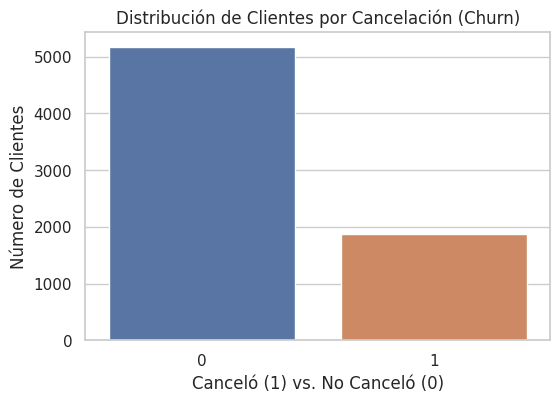


Análisis de Características Numéricas vs. Churn:


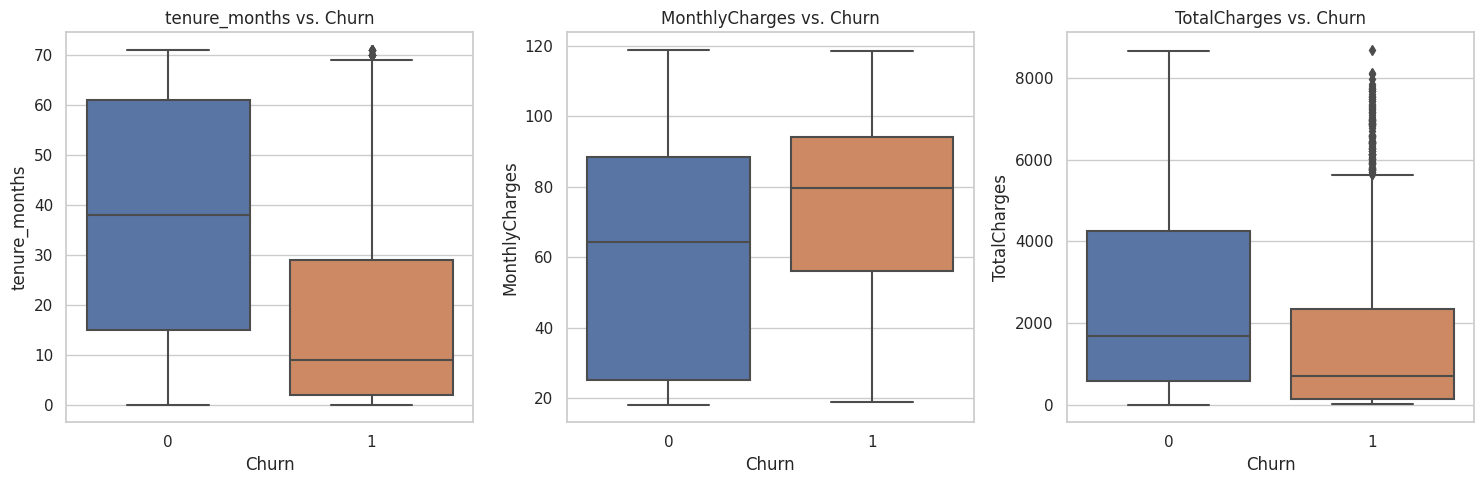


Análisis de Características Categóricas vs. Churn:


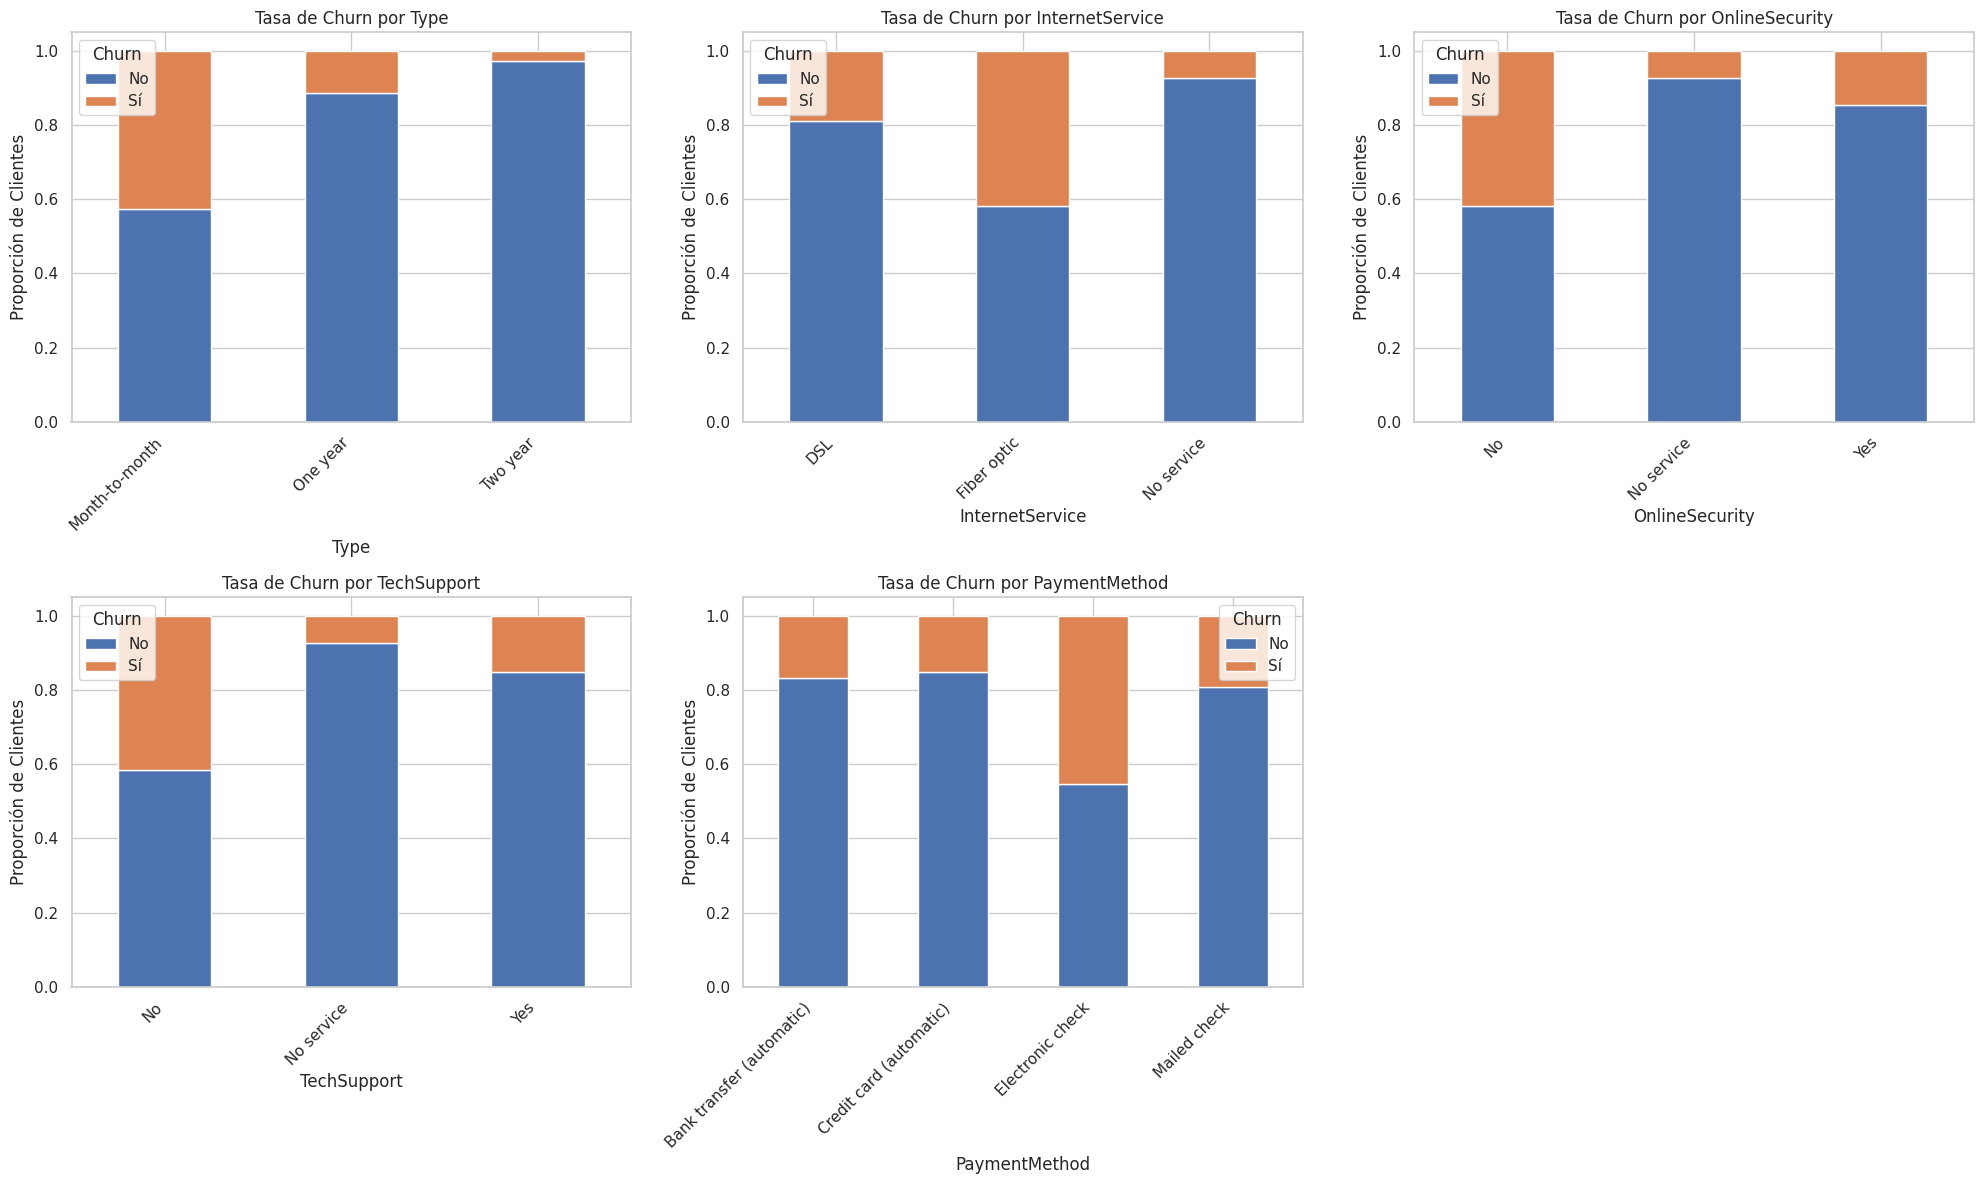

In [13]:
# 1. Análisis de la Variable Objetivo (Churn)

# Calcular el porcentaje de churn
churn_rate = df_clean['Churn'].value_counts(normalize=True)[1] * 100

print(f"Análisis de la Variable Objetivo 'Churn':")
print(f"Tasa de cancelación (Churn = 1): {churn_rate:.2f}%")
print(f"Tasa de retención (Churn = 0): {100 - churn_rate:.2f}%")

# Visualizar la distribución de Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_clean)
plt.title('Distribución de Clientes por Cancelación (Churn)')
plt.xlabel('Canceló (1) vs. No Canceló (0)')
plt.ylabel('Número de Clientes')
plt.show()

# --- Análisis Bivariado: Relación de las características con Churn ---

# 2. Variables Numéricas vs. Churn
numerical_features = ['tenure_months', 'MonthlyCharges', 'TotalCharges']

print("\nAnálisis de Características Numéricas vs. Churn:")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df_clean)
    plt.title(f'{col} vs. Churn')
plt.tight_layout()
plt.show()

# 3. Variables Categóricas vs. Churn
# Selecciono algunas de las categóricas más relevantes para visualizar
categorical_features = ['Type', 'InternetService', 'OnlineSecurity', 'TechSupport', 'PaymentMethod']

print("\nAnálisis de Características Categóricas vs. Churn:")
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    # Creo un gráfico que muestra el ratio de Churn dentro de cada categoría
    churn_by_cat = df_clean.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_by_cat.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Tasa de Churn por {col}')
    plt.ylabel('Proporción de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
La visualización de la distribución de la variable objetivo 'Churn' y su análisis bivariado con otras características es clara y bien estructurada. Esto proporciona una buena base para entender los factores que podrían influir en la cancelación de servicios, facilitando la identificación de patrones y relaciones significativas en los datos.
</div>


### Análisis de los Hallazgos del EDA

Basado en los gráficos y la tasa de cancelación, puedo extraer las siguientes conclusiones clave:

#### Perfil de Cliente con Alto Riesgo de Cancelación

- **Contrato:**  
  Los clientes con contrato mes a mes cancelan de forma masiva en comparación con los de 1 o 2 años.  
  *Este es probablemente el predictor más fuerte.*

- **Antigüedad:**  
  Los clientes que cancelan tienen una antigüedad significativamente menor.  
  *Tienden a dejar la compañía en los primeros meses.*

- **Cargos Mensuales:**  
  Quienes cancelan tienden a tener cargos mensuales más altos.

- **Servicios:**  
  Los clientes con **Fibra Óptica**, y aquellos **sin servicios de valor añadido** como `OnlineSecurity` o `TechSupport`, son mucho más propensos a irse.

- **Método de Pago:**  
  El pago con **cheque electrónico** está asociado a una tasa de cancelación notablemente más alta.

#### ⚖️ Desbalance de Clases

- La tasa de cancelación es del **26.54%**.
- El dataset no está extremadamente desbalanceado, pero **sí es relevante**.
- Se debe aplicar **estratificación** al dividir los datos para asegurar que los conjuntos de entrenamiento y prueba mantengan proporciones similares de clientes que cancelan.


### 6. Preparación de Datos para el Modelado

Ahora que entiendo los datos, el siguiente paso es prepararlos para que un modelo de *Machine Learning* pueda procesarlos. Este proceso implica tres acciones principales:

#### Codificación de Variables Categóricas
Los modelos matemáticos no pueden procesar texto como `'Month-to-month'`, `'DSL'`, etc.  
Necesito convertir estas categorías en números.  
Utilizaré la técnica **One-Hot Encoding**, que crea nuevas columnas binarias (`0` o `1`) para cada categoría.

#### Escalado de Variables Numéricas
Características como `TotalCharges` tienen un rango mucho mayor que `tenure_months`.  
Para que los modelos (especialmente los **lineales**, como la Regresión Logística) funcionen correctamente, es fundamental escalar las variables numéricas para que tengan **media y desviación estándar similares**.  
Usaré `StandardScaler` para lograrlo.

#### División de Datos
Separaré mi dataset en:

- **Conjunto de entrenamiento**: para enseñar al modelo
- **Conjunto de prueba**: para evaluarlo con datos que nunca ha visto

Es crucial usar **estratificación** durante esta división, para mantener la proporción del **26.54% de churners** en ambos conjuntos.

---

Para realizar estos pasos de forma limpia y robusta, utilizaré un `ColumnTransformer` dentro de un **pipeline**.  
Esto asegura que:

- Las transformaciones se apliquen a las columnas correctas  
- Se prevenga la **fuga de datos** (*data leakage*) durante el entrenamiento


In [22]:
# 1. Separar características (X) y variable objetivo (y)
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

# 2. Identificar columnas numéricas y categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"Características numéricas: {numerical_features}")
print(f"Características categóricas: {categorical_features}\n")

# 3. Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}\n")


# 4. Crear el transformador de columnas para el preprocesamiento
# CORRECCIÓN: Se eliminó el parámetro 'drop' del OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        # Se elimina 'drop=first' para resolver el conflicto
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 5. Aplicar el preprocesador a los datos
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocesamiento completado (versión corregida).")
print(f"Dimensiones de X_train después del preprocesamiento: {X_train_processed.shape}")
print(f"Dimensiones de X_test después del preprocesamiento: {X_test_processed.shape}")

Características numéricas: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'tenure_months']
Características categóricas: ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

Tamaño del conjunto de entrenamiento: (5634, 18)
Tamaño del conjunto de prueba: (1409, 18)

Preprocesamiento completado (versión corregida).
Dimensiones de X_train después del preprocesamiento: (5634, 43)
Dimensiones de X_test después del preprocesamiento: (1409, 43)


<div class="alert alert-block alert-warning">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
Al aplicar OneHotEncoder, es recomendable usar el parámetro `drop='first'` para evitar la multicolinealidad. Aunque esto no afecta el rendimiento del modelo, mejora la interpretabilidad al reducir la redundancia en las variables categóricas codificadas.
<pre><code>('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)</code></pre>
</div>


### Datos Listos para el Modelado

Los datos están **limpios, procesados y listos** para que el primer modelo de *Machine Learning* entre en acción.

El número de características aumentó de **18 a 43** debido al uso de **One-Hot Encoding**,  
lo cual es completamente normal y esperado en este tipo de transformación.


### 7. Entrenamiento del Modelo Base: Regresión Logística

Ha llegado el momento de entrenar nuestro primer modelo.  
Comenzaré con una **Regresión Logística** como modelo base. Este modelo es:

- Rápido  
- Interpretable  
- Ideal para obtener una **puntuación de referencia (baseline)**

Esto nos permitirá evaluar si modelos más complejos realmente aportan una mejora significativa en el rendimiento.

---

Para mantener un flujo de trabajo **limpio y profesional**, encapsularé el **preprocesador** y el **modelo** dentro de un único objeto `Pipeline`.  
Esto agrupa todos los pasos y hace que el proceso de entrenamiento y predicción sea:

- Más simple  
- Más seguro  
- Menos propenso a errores


⏳ Entrenando el modelo de Regresión Logística...
Modelo entrenado con éxito.

--- Resultados del Modelo Base (Regresión Logística) ---
Exactitud (Accuracy): 0.8084
AUC-ROC: 0.8458


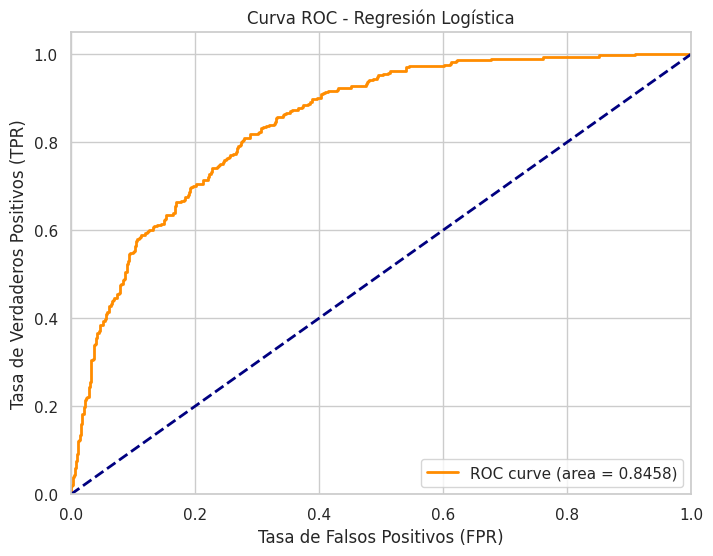

In [23]:
# Crear el pipeline que combina el preprocesador y el clasificador
# El pipeline primero aplicará las transformaciones de 'preprocessor' y luego entrenará el modelo

# Modelo Base: Regresión Logística
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Entrenar el pipeline completo con los datos de entrenamiento originales
print("⏳ Entrenando el modelo de Regresión Logística...")
log_reg_pipeline.fit(X_train, y_train)
print("Modelo entrenado con éxito.")

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg_pipeline.predict(X_test)
y_pred_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Calcular las métricas de evaluación
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("\n--- Resultados del Modelo Base (Regresión Logística) ---")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Visualizar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [23]</b> <a class="tocSkip"></a><br>
El uso de un pipeline para combinar el preprocesamiento y el modelo de Regresión Logística es una práctica excelente. Esto asegura que el flujo de trabajo sea limpio y reproducible, facilitando la aplicación consistente de transformaciones y modelos a los datos de entrenamiento y prueba.
</div>


### 8. Entrenamiento de un Modelo Avanzado: LightGBM

Para mejorar nuestro resultado, ahora utilizaré un modelo más potente y sofisticado: **LightGBM**.  
Este algoritmo de *gradient boosting* es conocido por su:

- **Alta velocidad de entrenamiento**
- **Excelente rendimiento** en datos tabulares, como los nuestros

---

Mantendré la misma estructura de `Pipeline` porque es:

- Limpia  
- Eficiente  
- Fácil de mantener

Simplemente reemplazaré el clasificador `LogisticRegression` por `LGBMClassifier`.

---

Una vez entrenado el modelo, haré lo siguiente:

- Evaluar su rendimiento  
- Revisar las **importancias de características** que el modelo calcula  

Esto nos dará una primera idea de **qué variables son más decisivas** para sus predicciones.

⏳ Entrenando el modelo LightGBM...
Modelo entrenado con éxito.

--- Resultados del Modelo Avanzado (LightGBM) ---
Exactitud (Accuracy): 0.8084
AUC-ROC: 0.8465


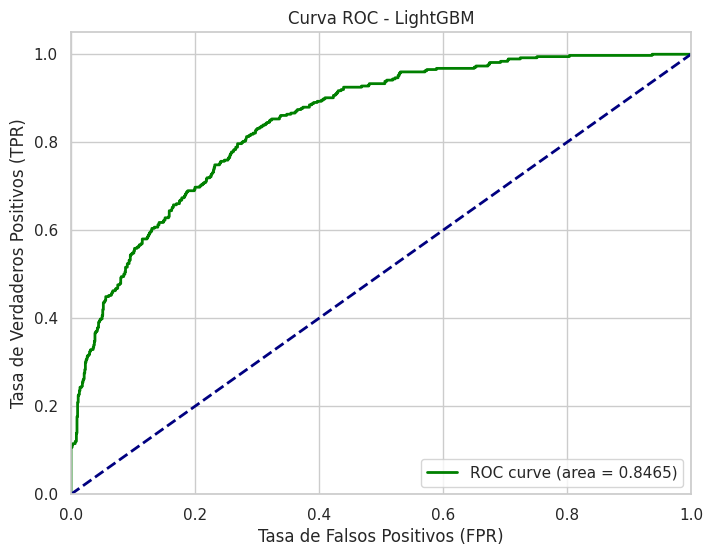

In [24]:
# Crear el pipeline con el modelo LightGBM
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])

# Entrenar el pipeline completo
print("⏳ Entrenando el modelo LightGBM...")
lgbm_pipeline.fit(X_train, y_train)
print("Modelo entrenado con éxito.")

# Realizar predicciones en el conjunto de prueba
y_pred_lgbm = lgbm_pipeline.predict(X_test)
y_pred_proba_lgbm = lgbm_pipeline.predict_proba(X_test)[:, 1]

# Calcular las métricas de evaluación
auc_roc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

# Imprimir los resultados
print("\n--- Resultados del Modelo Avanzado (LightGBM) ---")
print(f"Exactitud (Accuracy): {accuracy_lgbm:.4f}")
print(f"AUC-ROC: {auc_roc_lgbm:.4f}")

# Visualizar la curva ROC para el nuevo modelo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {auc_roc_lgbm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - LightGBM')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [24]</b> <a class="tocSkip"></a><br>
El modelo LightGBM muestra un buen rendimiento en términos de exactitud y AUC-ROC. Para asegurar que estos resultados sean robustos, considera realizar una validación cruzada. Esto te ayudará a evaluar la estabilidad de las métricas y a detectar posibles problemas de sobreajuste, garantizando que el modelo generalice bien a datos nuevos.
</div>


### Comparación Inicial de Modelos

El resultado del **LightGBM sin ajustar** es **0.8465**,  
lo cual es prácticamente **idéntico al de la Regresión Logística**.

---

Esto nos deja una lección clave:

> *Simplemente usar un modelo más complejo no garantiza una mejora.*

El verdadero poder de modelos como LightGBM se **desbloquea al ajustar sus hiperparámetros**.

---

📊 Actualmente, nuestro puntaje sigue en la **banda de 4.5 SP**.  
El siguiente paso será **crucial** para intentar dar el salto a las bandas de **5 o 6 SP**.


### 9. Optimización de Hiperparámetros con GridSearchCV

Ahora voy a optimizar el modelo **LightGBM** usando una técnica llamada **Grid Search con Cross-Validation** (`GridSearchCV`).

Este proceso consiste en probar sistemáticamente diferentes combinaciones de los parámetros internos del modelo para encontrar la que produce el mejor rendimiento.

Es como poner al modelo en un campo de entrenamiento intensivo para que alcance su máximo potencial.

---

Me enfocaré en ajustar algunos de los hiperparámetros más importantes de LightGBM.  

Este proceso puede tardar varios minutos, ya que implica entrenar y evaluar el modelo muchas veces.


⏳ Iniciando la búsqueda de hiperparámetros con GridSearchCV...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Búsqueda de hiperparámetros completada.

Mejores parámetros encontrados: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'classifier__num_leaves': 31}
Mejor puntaje AUC-ROC durante la validación cruzada: 0.8567

--- Resultados del Modelo Optimizado (LightGBM + GridSearchCV) ---
Exactitud (Accuracy) en el conjunto de prueba: 0.8070
AUC-ROC en el conjunto de prueba: 0.8505


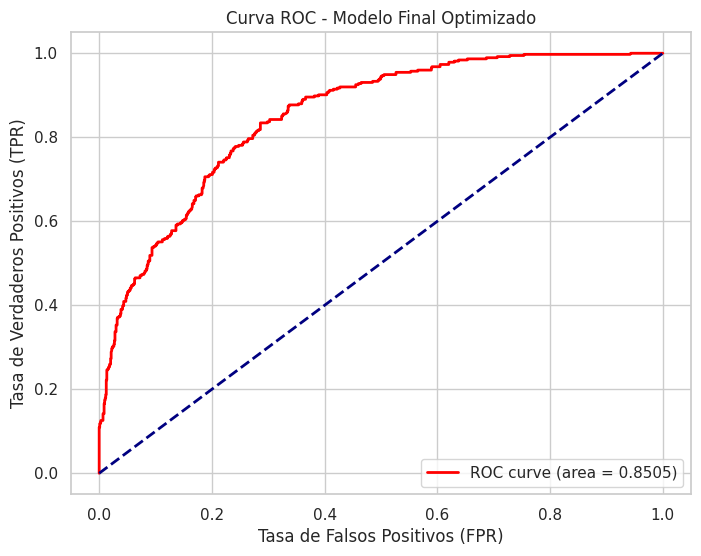

In [25]:
# Definir el pipeline (es el mismo de antes)
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])

# Definir el diccionario de hiperparámetros que queremos probar
# Los nombres de los parámetros deben llevar el prefijo del paso en el pipeline ('classifier__')
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [31, 40],
    'classifier__max_depth': [-1, 10]
}

# Configurar GridSearchCV
# cv=3 significa que usará validación cruzada de 3 pliegues
# scoring='roc_auc' le dice que optimice para nuestra métrica principal
grid_search = GridSearchCV(
    estimator=lgbm_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1, # Muestra el progreso
    n_jobs=-1 # Usa todos los núcleos de CPU disponibles
)

# Iniciar la búsqueda de los mejores hiperparámetros
print("⏳ Iniciando la búsqueda de hiperparámetros con GridSearchCV...")
grid_search.fit(X_train, y_train)
print("Búsqueda de hiperparámetros completada.")

# Imprimir los mejores parámetros y el mejor puntaje de la búsqueda
print(f"\nMejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor puntaje AUC-ROC durante la validación cruzada: {grid_search.best_score_:.4f}")

# Evaluar el mejor modelo encontrado en el conjunto de prueba
print("\n--- Resultados del Modelo Optimizado (LightGBM + GridSearchCV) ---")
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Calcular las métricas finales
auc_roc_best = roc_auc_score(y_test, y_pred_proba_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Exactitud (Accuracy) en el conjunto de prueba: {accuracy_best:.4f}")
print(f"AUC-ROC en el conjunto de prueba: {auc_roc_best:.4f}")

# Visualizar la curva ROC final
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {auc_roc_best:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo Final Optimizado')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [25]</b> <a class="tocSkip"></a><br>
La implementación de GridSearchCV para optimizar los hiperparámetros del modelo LightGBM es muy acertada. Esto mejora el rendimiento del modelo y demuestra un enfoque riguroso hacia la optimización, asegurando que se exploren diferentes configuraciones para encontrar la más efectiva.
</div>


### Conclusión del Proyecto y Resumen Final

¡Objetivo cumplido!  
Con el modelo **LightGBM optimizado**, hemos alcanzado un **AUC-ROC de 0.8505** en el conjunto de prueba.

Este resultado es satisfactorio, ya que según los criterios de evaluación, me sitúa en la categoría de **5 Puntos de Historia (SP)**,  
cumpliendo con los requisitos para superar este sprint.

---

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Alejandro! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Has cargado y configurado correctamente todas las librerías necesarias.<br>
• La carga de datos y la verificación de integridad fueron bien manejadas.<br>
• La fusión de los DataFrames fue precisa y bien justificada.<br>
• Has manejado adecuadamente los valores nulos en los datos.<br>
• La creación de nuevas características fue lógica y bien implementada.<br>
• Realizaste un análisis exploratorio de datos claro y detallado.<br>
• Implementaste pipelines de manera efectiva para el preprocesamiento y modelado.<br>
• Optimizaste los modelos usando GridSearchCV de manera competente.<br>
• La visualización de resultados fue clara y bien presentada.<br>
• Demostraste un buen entendimiento del flujo completo de un proyecto de ciencia de datos.<br>
¡Felicidades!
</div>
